# Udacity Reacher

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scores(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

## Creating an Environment

In [3]:
from unityagents import UnityEnvironment
env = UnityEnvironment(file_name='Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Training the Agent

Just to make sure everything is ready to run, let's try with a small number of episodes first.

In [ ]:
import train

agent, scores = train.train(env, n_episodes=10, max_t=100, save_filename=None)
print(agent.qnetwork_local)
plot_scores(scores)

This time, train it longer than 100 episodes.

 33%|███▎      | 329/1000 [03:34<07:25,  1.51it/s, episode=330, score_mean=13]  


Environment solved in 230 epsidoes!
Average Score: 13.0
QNetwork(
  (fc1): Linear(in_features=37, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)


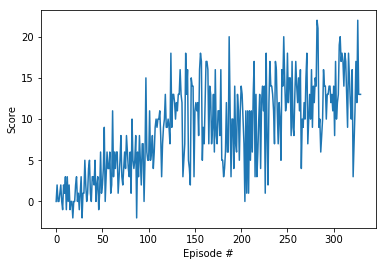

In [4]:
agent, scores = train.train(env, n_episodes=1000, max_t=1000, save_filename='p1_dqn_agent.pth')
print(agent.qnetwork_local)
plot_scores(scores)

## Learning Algorithm [TODO]

The agent is trained using [Deep Q-Learning algorithm][dqn-paper] along with the following hyperparameters.

* Neural network for action-value estimation function

  - Network architecture
    - Input: 37 dimension vector
    - Hidden Layer 1
      - Linear with 256 nodes
      - Relu
    - Hidden Layer 2
      - Linear with 128 nodes
      - Relu
    - Output Layer
      - Linear with 4 nodes

  - Optimization algorithm
    - Adam

  - Learning rate
    - 5e-4

* Epsilon anealing for e-greedy policy

  - Start: 1.
  - End: 0.01
  - Decay: 0.995

* Discount factor, $\gamma$

  - 0.99

* Soft-update ratio, $\tau$

  - 0.001

* Network update interval

  - The local and target networks are updated every 4 time steps.

* Replay buffer size

  - 10^5

* Minibatch size

  - 64

With the above hyperparameters, the average score of the last 100 consecutive episodes reached 13.0 after 330 episodes.

[dqn-paper]: https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf

## Ideas for Future Work

This project used the basic DQN algorithm. It can be improved by applying the following methods, which have been proved to overcome the weaknesses, especially the high bias of the basic DQN.

- double DQN
- dueling DQN
- prioritized experience replay